## Convolutional Neural Networks (CNNs)

Now we'll introduce one of the most useful devices in computer vision.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

### Square Detector

Let's start off with the by making some images of squares.  We'll explore some common data and algorithm related mistakes!  The sharp eyed amoungst you will notice the training data we're making is going to be terrible for making an algorithm that will generalize.  Don't panic - you'll be fixing this later!

In [17]:
def data_generator(shape,square=False):
    data_array = np.zeros(shape)
    for i in range(data_array.shape[0]):
        data = np.zeros_like(data_array[i])
        if square:
            data[2:4,2:4] = 1.0
        data = data + 0.2*np.random.rand(data.shape[0],data.shape[1])
        data = np.clip(data,0.0,1.0)
        data = data - 0.1*np.random.rand(data.shape[0],data.shape[1])
        data = np.clip(data,0.0,1.0)
        data_array[i] = data
    return data_array

def make_data():
    x_background = data_generator((10,5,5))
    x_square = data_generator((10,5,5),True)
    y_square = np.ones(x_square.shape[0])
    y_background = np.zeros(x_background.shape[0])
    return np.vstack((x_square,x_background)), np.append(y_square,y_background)

In [18]:
x, y = make_data()
print(x.shape, y.shape)

(20, 5, 5) (20,)


###  Look at the data.

First rule.  Always look at the data.

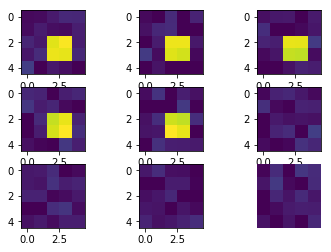

In [19]:
def one_plot(data):
    plt.axis('off')
    im = plt.imshow(data)
    im.set_clim(0,1)

def plotter(data):
    n = int(min(4,np.sqrt(data.shape[0])))
    _, axes = plt.subplots(n,n)
    for ax, d in zip(axes.flatten(),data[:n*n,:,:]):
        plt.axis('off')
        im = ax.imshow(d)
        im.set_clim(0,1)
    plt.axis('off')

    
plotter(x[5:15])

### Defining the Network

Okay hold onto your opinions about why this won't work a little longer - let's make a neural net

In [20]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(5,5,1,)))
model.add(Flatten())
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [21]:
x_prep = np.expand_dims(x,axis=3)
y_prep = np.expand_dims(y,axis=1)
model.fit(x_prep,y_prep,epochs=100)

Epoch 1/100
20/20 [==============================] - 3s 165ms/step - loss: 0.6800
Epoch 2/100
20/20 [==============================] - 0s 252us/step - loss: 0.6768
Epoch 3/100
20/20 [==============================] - 0s 248us/step - loss: 0.6727
Epoch 4/100
20/20 [==============================] - 0s 194us/step - loss: 0.6685
Epoch 5/100
20/20 [==============================] - 0s 222us/step - loss: 0.6642
Epoch 6/100
20/20 [==============================] - 0s 179us/step - loss: 0.6599
Epoch 7/100
20/20 [==============================] - 0s 203us/step - loss: 0.6557
Epoch 8/100
20/20 [==============================] - 0s 317us/step - loss: 0.6516
Epoch 9/100
20/20 [==============================] - 0s 242us/step - loss: 0.6475
Epoch 10/100
20/20 [==============================] - 0s 184us/step - loss: 0.6431
Epoch 11/100
20/20 [==============================] - 0s 272us/step - loss: 0.6387
Epoch 12/100
20/20 [==============================] - 0s 349us/step - loss: 0.6341
Epoch 13/100


Epoch 100/100
20/20 [==============================] - 0s 340us/step - loss: 0.0568


In [22]:
h = model.predict(x_prep)

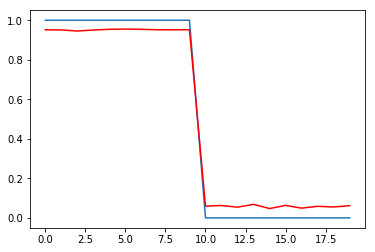

In [23]:
plt.plot(range(len(y)),y)
plt.plot(range(len(h)),h,color='r')

### The Importance of understanding your data

As an exercise I would like you now to get a perfect fit to the data.  Tip: you only need to change one number and re-run one cell.

## Does it generalize?

Our goal was to make a square detector (we could redefine our goal as getting a perfect fit to our data, but that is not so interesting) so, does it detect squares?  Let's give it an example:

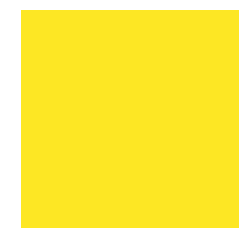

In [24]:
ex = np.ones_like(x[0])
one_plot(ex)

Square or not a square?  What do you think?  I guess we could argue that either way.  I want my detector to say not a square though (0).

In [25]:
ex_prep = np.expand_dims(ex,axis=3)
ex_prep = np.expand_dims(ex_prep,axis=0)
print(model.predict(ex_prep))

[[ 0.05555356]]


Okay, not bad.  I have a theory though.  Let's try this one:

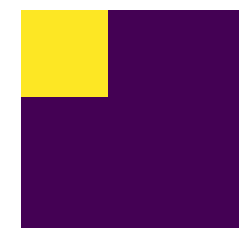

In [26]:
ex_2 = np.zeros_like(ex)
ex_2[:2,:2] = 1.0
ex_2_prep = np.expand_dims(ex_2, axis=3)
ex_2_prep = np.expand_dims(ex_2_prep, axis=0)
one_plot(ex_2)

### Will it blend?

In [27]:
print(model.predict(ex_2_prep))

[[ 0.02746093]]


That's pretty clear!!  

## Exercises

1. Try to comment out different layers in our conv net (`model`).  What happens as you comment out each one?  Does it still work without any of them?

2. Add another fully connected layer (`Dense`) to the model.  Where should you add it?  What does it do?

3.  Check out which other activation functions are available here: https://keras.io/activations/ .  Can you change the activation functions in any of the layers and still get good results?  Experiment!

4. One problem here is that we have very little training data.  Modify the `make_data` function to return more training samples.

5.  Another problem with the training data is that the squares are all in the same place, are all the same size and are all the same colour (luminosity).  Generate new training data with variations in square size, location and colour. 

